In [3]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
img = cv2.imread(r'test_images/maria_sharapova.jpg')
img.shape

(259, 195, 3)

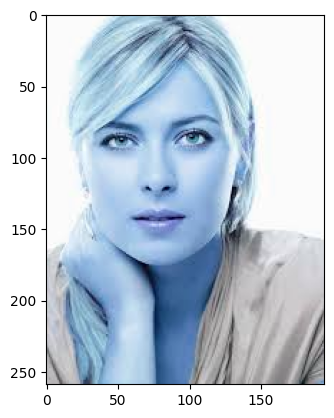

In [5]:
plt.imshow(img)

In [6]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(259, 195)

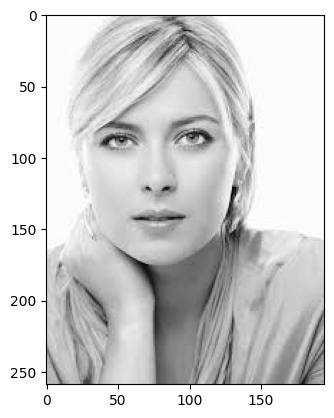

In [7]:
plt.imshow(gray, cmap = 'gray')

In [8]:
gray

array([[251, 251, 251, ..., 251, 251, 251],
       [251, 251, 251, ..., 251, 251, 251],
       [251, 251, 251, ..., 251, 251, 251],
       ...,
       [191, 189, 185, ..., 171, 165, 156],
       [191, 189, 185, ..., 146, 153, 164],
       [192, 189, 185, ..., 180, 182, 185]], dtype=uint8)

In [9]:
face_cascade = cv2.CascadeClassifier(r'opencv/harrdcascade/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(r'opencv/harrdcascade/haarcascade_eye.xml')
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[ 10,  32, 140, 140]])

In [10]:
(x,y,w,h) = faces[0]
x,y,w,h

(10, 32, 140, 140)

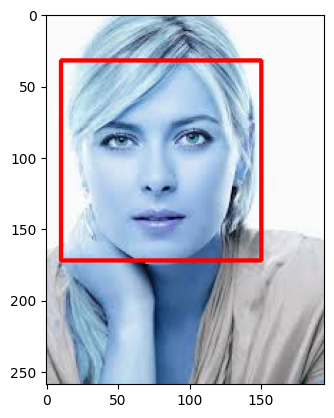

In [11]:
face_img = cv2.rectangle(img, (x,y),(x+w, y+h), (255,0,0),2)
plt.imshow(face_img)

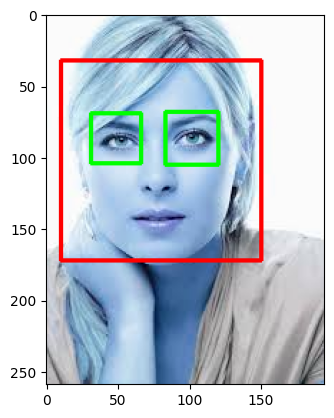

In [12]:
cv2.destroyAllWindows()
for x,y,w,h in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w, y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color, (ex,ey),(ex+ew,ey+eh), (0,255,0),2)
        
        
plt.figure()
plt.imshow(face_img, cmap = 'gray')
plt.show()

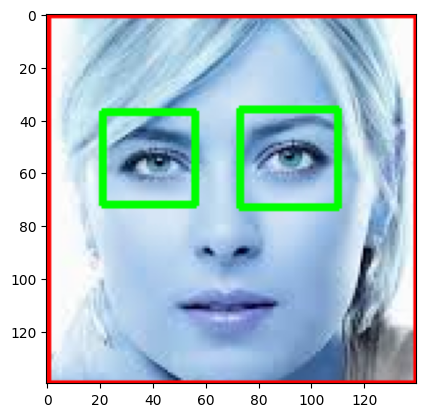

In [13]:
%matplotlib inline
plt.imshow(roi_color, cmap = 'gray')

In [14]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

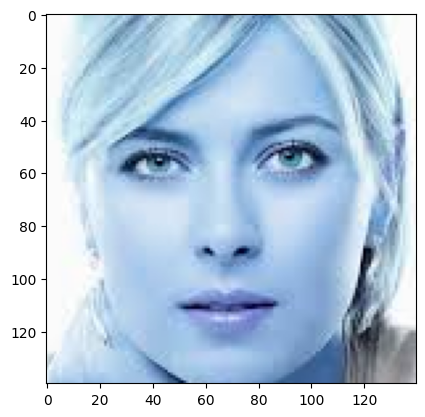

In [15]:
cropped_image_1 = get_cropped_image_if_2_eyes(r'test_images/maria_sharapova.jpg')
plt.imshow(cropped_image_1)

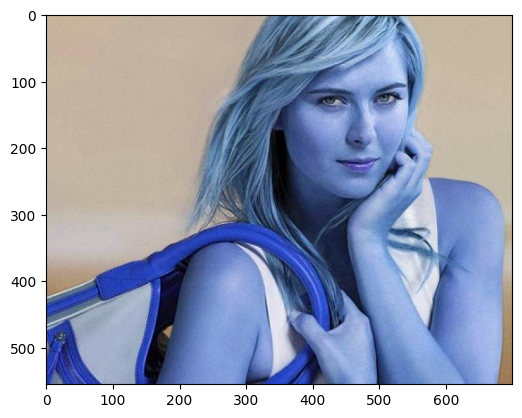

In [16]:
new_image = cv2.imread(r'test_images/sharapova1.jpg')
plt.imshow(new_image)

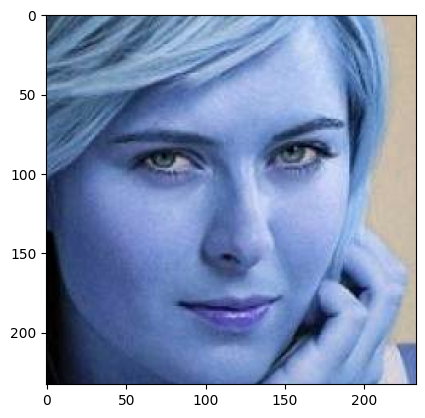

In [17]:
cropped_image = get_cropped_image_if_2_eyes(r'test_images/sharapova1.jpg')
plt.imshow(cropped_image)

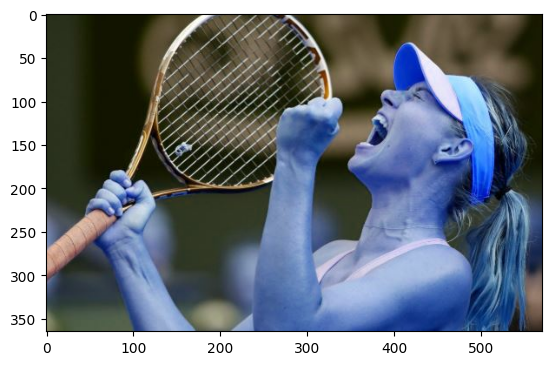

In [18]:
new_image_1 = cv2.imread(r'test_images/sharapova2.jpg')
plt.imshow(new_image_1)

In [19]:
path_to_data = r'dataset'
path_to_crope_dataset = r'dataset/cropped//'

In [20]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [21]:
img_dirs

['dataset\\cropped',
 'dataset\\lional messi',
 'dataset\\maria sharapova',
 'dataset\\roger federer',
 'dataset\\serena williams',
 'dataset\\virat kohli']

In [22]:
import shutil
if os.path.exists(path_to_crope_dataset):
    shutil.rmtree(path_to_crope_dataset)

os.mkdir(path_to_crope_dataset)

In [23]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split("\\")[-1]
    print(celebrity_name)
    celebrity_file_names_dict[celebrity_name] = []
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_crope_dataset + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print('Generating cropped image in folder: ', cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "\\" + cropped_file_name
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1
    

cropped
lional messi
Generating cropped image in folder:  dataset/cropped//lional messi
maria sharapova
Generating cropped image in folder:  dataset/cropped//maria sharapova
roger federer
Generating cropped image in folder:  dataset/cropped//roger federer
serena williams
Generating cropped image in folder:  dataset/cropped//serena williams
virat kohli
Generating cropped image in folder:  dataset/cropped//virat kohli


### Wavelate Transformation

In [42]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

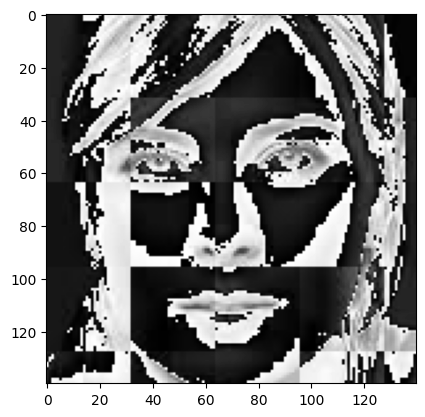

In [43]:
im_har = w2d(cropped_image_1,'db1',5)
plt.imshow(im_har, cmap='gray')

In [44]:
celebrity_file_names_dict

{'cropped': [],
 'lional messi': ['dataset/cropped//lional messi\\lional messi1.png',
  'dataset/cropped//lional messi\\lional messi2.png',
  'dataset/cropped//lional messi\\lional messi3.png',
  'dataset/cropped//lional messi\\lional messi4.png',
  'dataset/cropped//lional messi\\lional messi5.png',
  'dataset/cropped//lional messi\\lional messi6.png',
  'dataset/cropped//lional messi\\lional messi7.png',
  'dataset/cropped//lional messi\\lional messi8.png',
  'dataset/cropped//lional messi\\lional messi9.png',
  'dataset/cropped//lional messi\\lional messi10.png',
  'dataset/cropped//lional messi\\lional messi11.png',
  'dataset/cropped//lional messi\\lional messi12.png',
  'dataset/cropped//lional messi\\lional messi13.png',
  'dataset/cropped//lional messi\\lional messi14.png',
  'dataset/cropped//lional messi\\lional messi15.png',
  'dataset/cropped//lional messi\\lional messi16.png',
  'dataset/cropped//lional messi\\lional messi17.png',
  'dataset/cropped//lional messi\\lional m

In [45]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'cropped': 0,
 'lional messi': 1,
 'maria sharapova': 2,
 'roger federer': 3,
 'serena williams': 4,
 'virat kohli': 5}

In [46]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        if img is None:
            continue
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])

In [47]:
len(X)

197

In [48]:
len(X[0])

4096

In [49]:
X[0]

array([[100],
       [129],
       [140],
       ...,
       [237],
       [234],
       [232]], dtype=uint8)

In [50]:
X = np.array(X).reshape(len(X), 4096).astype(float)
X.shape

(197, 4096)

In [51]:
X[0]

array([100., 129., 140., ..., 237., 234., 232.])

### Data cleaning process is done now we create Data Modeling

In [53]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [54]:
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state = 0)
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(x_train, y_train)
pipe.score(x_test, y_test)

0.78

In [55]:
len(x_test)

50

In [56]:
print(classification_report(y_test, pipe.predict(x_test)))

              precision    recall  f1-score   support

           1       0.90      0.82      0.86        11
           2       1.00      0.67      0.80         9
           3       0.75      0.60      0.67         5
           4       0.90      0.75      0.82        12
           5       0.60      0.92      0.73        13

    accuracy                           0.78        50
   macro avg       0.83      0.75      0.77        50
weighted avg       0.82      0.78      0.78        50



### Grid Search CV for Hyperparameter tunning for best model

In [57]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [58]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [63]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(x_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.767816,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.617471,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.828966,{'logisticregression__C': 1}


In [64]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [65]:
best_estimators['svm'].score(x_test, y_test)

0.76

In [66]:
best_estimators['random_forest'].score(x_test, y_test)

0.66

In [67]:
best_estimators['logistic_regression'].score(x_test, y_test)

0.8

In [68]:
best_clf = best_estimators['svm']

In [69]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(x_test))
cm

array([[ 9,  0,  0,  0,  2],
       [ 1,  6,  0,  0,  2],
       [ 2,  0,  3,  0,  0],
       [ 0,  0,  2,  9,  1],
       [ 2,  0,  0,  0, 11]], dtype=int64)

### Visualize the confusion matrix

Text(95.72222222222221, 0.5, 'Truth')

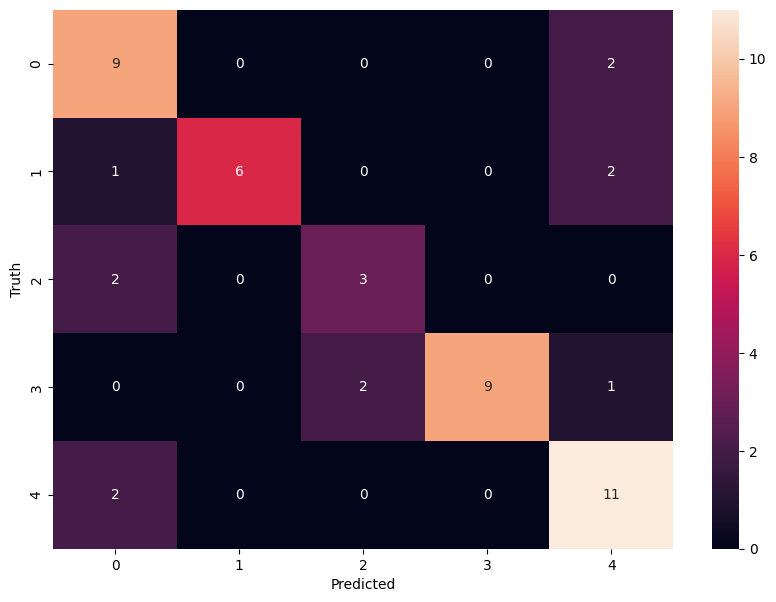

In [72]:
import seaborn as sns
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [73]:
class_dict

{'cropped': 0,
 'lional messi': 1,
 'maria sharapova': 2,
 'roger federer': 3,
 'serena williams': 4,
 'virat kohli': 5}

### Save the trained model

In [74]:
import joblib
# save the model as a pickle file
joblib.dump(best_clf, 'saved_model.pkl')

['saved_model.pkl']

### Save class Dictionary

In [75]:
import json
with open('class_dictionary.json', 'w') as f:
    f.write(json.dumps(class_dict))